In [1]:
import pandas as pd

treino = pd.read_csv('treino.csv')
teste = pd.read_csv('teste.csv')

In [2]:
treino.head()

,Escolaridade,Entrada,Cidade,Salário,Idade,Sexo,Projeto,Experiência,Saiu,Feedbacks
0,Doutorado,2016,Natal,3,28,Feminino,Não,3,0,0
1,Doutorado,2014,Natal,3,36,Feminino,Não,3,0,1
2,Doutorado,2013,Natal,3,---,Masculino,Não,0,0,0
3,Doutorado,2016,Natal,3,---,Masculino,Não,2,1,0
4,Doutorado,2018,Natal,3,34,Masculino,Sim,5,1,0


In [3]:
treino.corr()

,Entrada,Salário,Experiência,Saiu,Feedbacks
Entrada,1.000000,-0.076582,-0.023939,0.152780,-0.008268
Salário,-0.076582,1.000000,0.003109,-0.182883,-0.012881
Experiência,-0.023939,0.003109,1.000000,-0.001677,0.013210
Saiu,0.152780,-0.182883,-0.001677,1.000000,0.015026
Feedbacks,-0.008268,-0.012881,0.013210,0.015026,1.000000


In [4]:
teste.shape

(1737, 9)

In [5]:
treino.shape

(2916, 10)

In [6]:
# substituição dos valores de Escolaridade
treino.loc[treino['Escolaridade'] == '---','Escolaridade']=0
teste.loc[teste['Escolaridade'] == '---','Escolaridade']=0
treino.loc[treino['Escolaridade'] == 'Doutorado','Escolaridade']=1
teste.loc[teste['Escolaridade'] == 'Doutorado','Escolaridade']=1

In [7]:
# criando uma função para localizar o ano de entrada
def loc_entrada_treino(x):
    y = treino['Entrada'].iloc[x]
    return y

def loc_entrada_teste(x):
    y = teste['Entrada'].iloc[x]
    return y

In [8]:
# cria uma nova coluna para identificar o tempo de Permanencia na empresa
treino['Permanencia'] = 0
teste['Permanencia'] = 0

In [9]:
# cria função para inserir valores na variável Permanencia
def alter_entrada_treino(x):
    z = (2021 - loc_entrada_treino(x))*2
    return z

def alter_entrada_teste(x):
    z = (2021 - loc_entrada_teste(x))*2
    return z

In [10]:
# cria função para inserir valores na variável Permanencia
def alter_entrada_treino(x):
    z = 2021 - loc_entrada_treino(x)
    return z

In [11]:
# cria função para inserir valores na variável Permanencia
def alter_entrada_teste(x):
    p = 2021 - loc_entrada_teste(x)
    return p

In [12]:
#inserindo valores na variável permanencia da base treino
q = len(treino)
r = list(range(0,q))
for x in r:
    treino['Permanencia'].iloc[x] = alter_entrada_treino(x)

c:\python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
#inserindo valores na variável permanencia da base teste
f = len(teste)
g = list(range(0,f))
for x in g:
    teste['Permanencia'].iloc[x] = alter_entrada_teste(x)

In [14]:
#deletando as colunas entrada da base treino e teste
treino = treino.drop(columns=['Entrada'])
teste = teste.drop(columns=['Entrada'])

In [15]:
# transformando as variáveis categóricas
treino = pd.get_dummies(treino, columns = ['Cidade'], dtype=int)
teste = pd.get_dummies(teste, columns = ['Cidade'], dtype=int)

In [16]:
# substituição dos valores de Salário
teste.loc[teste['Salário'] == 1,'Salário']='A'
treino.loc[treino['Salário'] == 1,'Salário']='A'
teste.loc[teste['Salário'] == 3,'Salário']=1
treino.loc[treino['Salário'] == 3,'Salário']=1
teste.loc[teste['Salário'] == 'A','Salário']=3
treino.loc[treino['Salário'] == 'A','Salário']=3

In [17]:
#transforma os string em numérico
treino.loc[treino['Idade'] == '---','Idade']=0
teste.loc[teste['Idade'] == '---','Idade']=0

In [18]:
#converte o tipo da variável
treino['Idade'] = treino['Idade'].astype('int')
teste['Idade'] = teste['Idade'].astype('int')

In [19]:
# faz a normalização dos dados
a = int(treino['Idade'].median())
b = int(teste['Idade'].median())

treino.loc[treino['Idade'] == 0,'Idade']=a
teste.loc[teste['Idade'] == 0,'Idade']=b

In [20]:
#transformando variável sexo
treino.loc[treino['Sexo'] == 'Masculino','Sexo']=0
teste.loc[teste['Sexo'] == 'Masculino','Sexo']=0
treino.loc[treino['Sexo'] == 'Feminino','Sexo']=1
teste.loc[teste['Sexo'] == 'Feminino','Sexo']=1

In [21]:
#transformando variável projetos
treino.loc[treino['Projeto'] == '---','Projeto']='ausente'
teste.loc[teste['Projeto'] == '---','Projeto']='ausente'

In [22]:
# transformando as variáveis categóricas
treino = pd.get_dummies(treino, columns = ['Projeto'], dtype=int)
teste = pd.get_dummies(teste, columns = ['Projeto'], dtype=int)

In [23]:
# substituição dos valores de feedback
teste.loc[teste['Feedbacks'] == 0,'Feedbacks']='A'
treino.loc[treino['Feedbacks'] == 0,'Feedbacks']='A'
teste.loc[teste['Feedbacks'] == 1,'Feedbacks']='B'
treino.loc[treino['Feedbacks'] == 1,'Feedbacks']='B'
teste.loc[teste['Feedbacks'] == 3,'Feedbacks']=1
treino.loc[treino['Feedbacks'] == 3,'Feedbacks']=1
teste.loc[teste['Feedbacks'] == 4,'Feedbacks']=0
treino.loc[treino['Feedbacks'] == 4,'Feedbacks']=0
teste.loc[teste['Feedbacks'] == 'A','Feedbacks']=4
treino.loc[treino['Feedbacks'] == 'A','Feedbacks']=4
teste.loc[teste['Feedbacks'] == 'B','Feedbacks']=3
treino.loc[treino['Feedbacks'] == 'B','Feedbacks']=3

In [24]:
print(treino.dtypes)

Escolaridade          object
Salário               object
Idade                  int32
Sexo                  object
Experiência            int64
Saiu                   int64
Feedbacks             object
Permanencia            int64
Cidade_João Pessoa     int32
Cidade_Natal           int32
Cidade_Recife          int32
Projeto_Não            int32
Projeto_Sim            int32
Projeto_ausente        int32
dtype: object


In [25]:
#converter as variáveis em numéricos
treino['Escolaridade'] = treino['Escolaridade'].astype('int')
teste['Escolaridade'] = teste['Escolaridade'].astype('int')
treino['Salário'] = treino['Salário'].astype('int')
teste['Salário'] = teste['Salário'].astype('int')
treino['Sexo'] = treino['Sexo'].astype('int')
teste['Sexo'] = teste['Sexo'].astype('int')
treino['Feedbacks'] = treino['Feedbacks'].astype('int')
teste['Feedbacks'] = teste['Feedbacks'].astype('int')

In [26]:
treino['Saiu'].value_counts()

0    1820
1    1096
Name: Saiu, dtype: int64

In [27]:
# realiza o balanceamento das bases
um  = treino[treino['Salário']==1]   #zero values in outcome column
dois = treino[treino['Salário']==2]  # one values in outcome column
tres = treino[treino['Salário']==3]
from sklearn.utils import resample
df_minority_um = resample(um, replace = True, n_samples = 2189) 
df_minority_dois = resample(dois, replace = True, n_samples = 1164)
df_minority_tres = resample(tres, replace = True, n_samples = 600) 

# concatena as variáveis "zero" e "one"
treino2 = pd.concat([um, df_minority_dois])
treino3 = pd.concat([treino2, df_minority_tres])

# realiza um ordenamento aleatório das variáveis
from sklearn.utils import shuffle
treino = shuffle(treino)

In [28]:
treino3['Salário'].value_counts()

1    2189
2    1164
3     600
Name: Salário, dtype: int64

In [29]:
treino = treino3
treino['Salário'].value_counts()

1    2189
2    1164
3     600
Name: Salário, dtype: int64

In [30]:
#Criando variaveis independentes e dependentes

X = treino
X = treino.drop('Saiu',axis=1)
y = treino['Saiu']

X_teste = teste

In [31]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino, y_teste  = train_test_split(X, y, test_size = 0.3,random_state = 1)
x_treino

,Escolaridade,Salário,Idade,Sexo,Experiência,Feedbacks,Permanencia,Cidade_João Pessoa,Cidade_Natal,Cidade_Recife,Projeto_Não,Projeto_Sim,Projeto_ausente
894,1,1,28,0,1,4,3,1,0,0,1,0,0
2663,1,1,35,0,2,4,4,1,0,0,0,0,1
333,1,1,34,0,3,4,4,0,0,1,1,0,0
1225,1,1,24,0,2,4,3,0,0,1,1,0,0
784,1,1,26,0,4,4,6,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1,1,24,0,2,4,9,1,0,0,1,0,0
1681,1,3,27,1,4,4,8,1,0,0,1,0,0
1451,1,1,40,0,0,4,7,0,1,0,1,0,0
301,0,1,26,1,4,4,9,0,1,0,1,0,0


<AxesSubplot:>

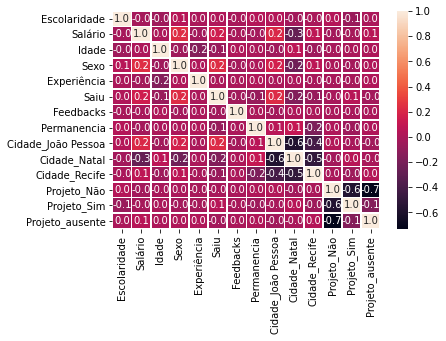

In [32]:
import seaborn as sn
correlation = treino.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [33]:
treino.corr()

,Escolaridade,Salário,Idade,Sexo,Experiência,Saiu,Feedbacks,Permanencia,Cidade_João Pessoa,Cidade_Natal,Cidade_Recife,Projeto_Não,Projeto_Sim,Projeto_ausente
Escolaridade,1.000000,-0.017344,-0.040111,0.050338,0.002872,0.024457,-0.009182,0.036822,0.036421,-0.030522,-0.004598,0.037513,-0.059914,0.004861
Salário,-0.017344,1.000000,0.010056,0.240058,-0.025965,0.156231,-0.006181,-0.019136,0.211494,-0.269378,0.075767,-0.032585,-0.017273,0.053642
Idade,-0.040111,0.010056,1.000000,-0.046062,-0.152102,-0.061102,0.016239,0.001172,-0.032823,0.072753,-0.046173,-0.011972,0.002159,0.012608
Sexo,0.050338,0.240058,-0.046062,1.000000,0.019921,0.235063,-0.022030,0.011158,0.174535,-0.229164,0.070155,0.001872,-0.021464,0.015665
Experiência,0.002872,-0.025965,-0.152102,0.019921,1.000000,0.005481,0.001746,0.020052,0.002402,0.005426,-0.008576,-0.010033,-0.017810,0.026944
Saiu,0.024457,0.156231,-0.061102,0.235063,0.005481,1.000000,-0.038483,-0.073988,0.229754,-0.154235,-0.071602,-0.010890,0.050648,-0.029172
Feedbacks,-0.009182,-0.006181,0.016239,-0.022030,0.001746,-0.038483,1.000000,0.007437,-0.021213,0.013814,0.007086,0.000968,-0.006826,0.004533
Permanencia,0.036822,-0.019136,0.001172,0.011158,0.020052,-0.073988,0.007437,1.000000,0.058091,0.106010,-0.179362,0.015731,-0.046483,0.019867
Cidade_João Pessoa,0.036421,0.211494,-0.032823,0.174535,0.002402,0.229754,-0.021213,0.058091,1.000000,-0.576340,-0.417255,0.032400,-0.006029,-0.033967
Cidade_Natal,-0.030522,-0.269378,0.072753,-0.229164,0.005426,-0.154235,0.013814,0.106010,-0.576340,1.000000,-0.502191,-0.031801,0.049263,-0.002845


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [101]:
modelo_base = RandomForestClassifier(n_estimators = 1000) 
modelo_base.fit(X, y)

RandomForestClassifier(n_estimators=1000)

In [102]:
modelo = modelo_base.predict(x_teste)
print(pd.crosstab(y_teste,modelo, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1   All
Real                   
0        706   18   724
1         32  430   462
All      738  448  1186


In [103]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, modelo))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       724
           1       0.96      0.93      0.95       462

    accuracy                           0.96      1186
   macro avg       0.96      0.95      0.96      1186
weighted avg       0.96      0.96      0.96      1186



In [104]:
from sklearn.ensemble import RandomForestClassifier

validacao_forest = StratifiedKFold(n_splits = 10)

modelo_forest = RandomForestClassifier(n_estimators = 1000) 

medidas_accuracy_forest = cross_validate(modelo_forest, X, y, cv = validacao_forest, 
                                         scoring = 'accuracy')
medidas_f1_forest = cross_validate(modelo_forest, X, y, cv = validacao_forest, 
                                   scoring = 'f1')
print('accuracy = ', medidas_accuracy_forest['test_score'].mean())
print('f1 = ', medidas_f1_forest['test_score'].mean())

accuracy =  0.8247749648382559
f1 =  0.7559589139578043


In [105]:
modelo_forest.fit(X, y)

RandomForestClassifier(n_estimators=1000)

In [106]:
pred = modelo_forest.predict(teste)
subm_bagging = pd.DataFrame()
subm_bagging['Saiu'] = pred
subm_bagging.to_csv('submvictor7.csv', index = False)

In [107]:
subm_forest = pd.DataFrame()
subm_forest['Saiu'] = pred

In [108]:
subm_forest['Saiu'].value_counts()

0    1212
1     525
Name: Saiu, dtype: int64